In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir = "../input/fer2013/train" # Directory containing the training data
test_dir = "../input/fer2013/test"  # Directory containing the validation data

In [3]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
# Define the model architecture
from tensorflow.keras.layers import Input

# Define the model architecture using Input
model = Sequential()

# Use Input layer to define the input shape
model.add(Input(shape=(48, 48, 1)))  # Specify the input shape

# Now, add the convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Add more layers as needed


# Add a third convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a third batch normalization layer
model.add(BatchNormalization())
# Add a fourth convolutional layer with 128 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# Add a fourth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Add a fifth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a fifth batch normalization layer
model.add(BatchNormalization())
# Add a sixth convolutional layer with 256 filters, 3x3 kernel size, and relu activation function
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
# Add a sixth batch normalization layer
model.add(BatchNormalization())
# Add a max pooling layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer with 0.25 dropout rate
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())
# Add a dense layer with 256 neurons and relu activation function
model.add(Dense(256, activation='relu'))
# Add a seventh batch normalization layer
model.add(BatchNormalization())
# Add a dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))
# Add a dense layer with 7 neurons (one for each class) and softmax activation function
model.add(Dense(7, activation='softmax'))

# Compile the model with categorical cross-entropy loss, adam optimizer, and accuracy metric
model.compile(loss="categorical_crossentropy", optimizer= tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    width_shift_range = 0.1,        # Randomly shift the width of images by up to 10%
    height_shift_range = 0.1,       # Randomly shift the height of images by up to 10%
    horizontal_flip = True,         # Flip images horizontally at random
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

# Rescale validation data
validation_datagen = ImageDataGenerator(
    rescale = 1./255,               # Rescale pixel values to be between 0 and 1
    validation_split = 0.2          # Set aside 20% of the data for validation
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,           # Directory containing the training data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "training"              # Uses the training subset of the data
)

# Load validation data
validation_generator = validation_datagen.flow_from_directory(
    directory = test_dir,            # Directory containing the validation data
    target_size = (48, 48),          # Resizes all images to 48x48 pixels
    batch_size = 64,                 # Number of images per batch
    color_mode = "grayscale",        # Converts the images to grayscale
    class_mode = "categorical",      # Classifies the images into 7 categories
    subset = "validation"            # Uses the validation subset of the data
)

# Print the number of images in each set
print("Training data count:", len(train_generator.filenames))
print("Validation data count:", len(validation_generator.filenames))

# Ensure validation_steps is set correctly in your training loop
validation_steps = len(validation_generator)

# Train the model with the callback
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback (save the model weights)
checkpoint_callback = ModelCheckpoint(
    filepath='model_weights.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

# Ensure this is placed after defining your model

# Now train the model with the callback
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    validation_freq=1,  # Ensures validation happens every epoch
    callbacks=[checkpoint_callback]
)


Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.
Training data count: 22968
Validation data count: 1432
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.1717 - loss: 2.9072
Epoch 1: val_accuracy improved from -inf to 0.24511, saving model to model_weights.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 128s 320ms/step - accuracy: 0.1718 - loss: 2.9054 - val_accuracy: 0.2451 - val_loss: 1.8275
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2256 - loss: 2.4182
Epoch 3: val_accuracy improved from 0.24511 to 0.34846, saving model to model_weights.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.2257 - loss: 2.4175 - val_accuracy: 0.3485 - val_loss: 1.7148
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 44us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.2735 - loss: 2.1896
Epoch 5: val_accuracy improved from 0.34846 to 0.38268, saving model to model_weights.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.2735 - loss: 2.1892 - val_accuracy: 0.3827 - val_loss: 1.6595
Epoch 6/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
356/359 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2934 - loss: 2.0692
Epoch 7: val_accuracy improved from 0.38268 to 0.41061, saving model to model_weights.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 30

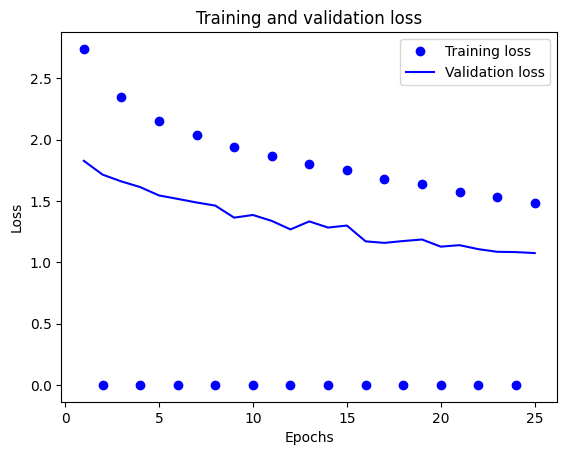

In [5]:
# Ensure both train_loss and val_loss have same number of epochs
train_loss = history.history['loss']
val_loss = history.history.get('val_loss', [])  # Safely get val_loss, or empty list if not available
import matplotlib.pyplot as plt

# If val_loss exists, we plot
if val_loss:
    epochs = range(1, len(val_loss) + 1)
    plt.plot(epochs, train_loss[:len(val_loss)], 'bo', label='Training loss')  # Match the length
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
else:
    print("Validation loss not available.")


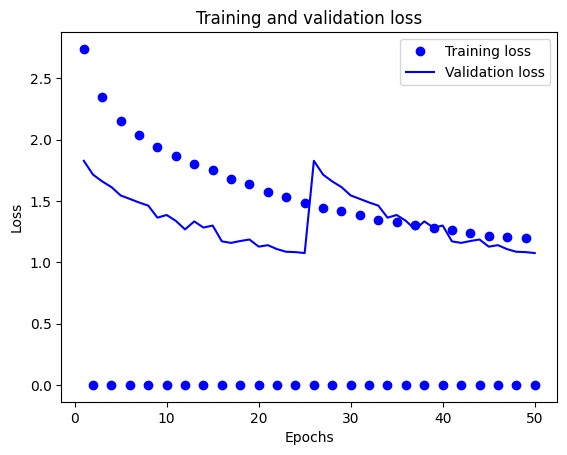

In [6]:
import matplotlib.pyplot as plt

# Extract loss values for training and validation
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Make sure that validation loss has the same length as training loss
# If the validation loss is recorded at a lower frequency (e.g., every 2nd epoch), 
# repeat the values to match the number of epochs.
if len(val_loss) < len(train_loss):
    val_loss = val_loss * (len(train_loss) // len(val_loss)) + val_loss[:len(train_loss) % len(val_loss)]

# Define the epochs
epochs = range(1, len(train_loss) + 1)

# Plot the train and validation loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


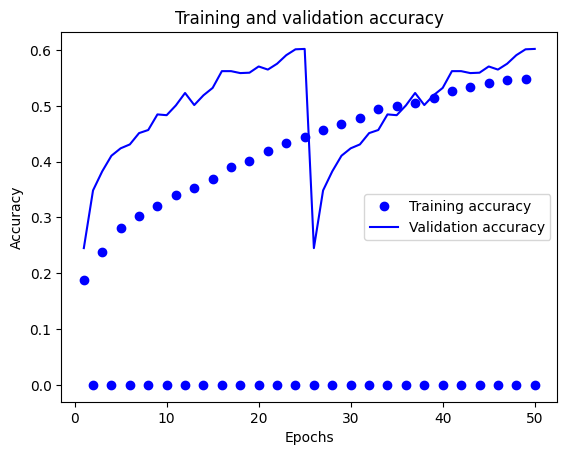

In [7]:
import matplotlib.pyplot as plt

# Extract accuracy values for training and validation
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Ensure validation accuracy has the same length as training accuracy
if len(val_acc) < len(train_acc):
    val_acc = val_acc * (len(train_acc) // len(val_acc)) + val_acc[:len(train_acc) % len(val_acc)]

# Define the epochs
epochs = range(1, len(train_acc) + 1)

# Plot the training and validation accuracy
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
